## Project: Heart Disease Prediction using Machine Learning algorithms

Project Guide: Prof. Kriti Srivastava

Made by: Pratik Mulchandani, Abigail Pereira, Mudra Nagda

The main objective of this Mini Project is to build a model that can __predict__ the heart disease occurrence, based on a combination of features (risk factors) describing the disease. Different machine learning __classification__ techniques will be implemented and compared upon standard performance metric such as accuracy. 

The dataset used for this study was taken from UCI machine learning repository, titled __[“Heart Disease Data Set”](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)__. 


Contents of the project:

1. Dataset structure & description
2. Analyze, identify patterns, and explore the data
3. Data preparation
4. Modelling and predicting with Machine Learning
5. Conclusion


### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 1. Dataset structure & description

The dataset used in this project contains 14 variables. The independent variable that needs to be predicted, 'diagnosis', determines whether a person is healthy or suffer from heart disease. Values 1-4 indicate the presence of the disease and severity. Value 0 indicates its absence.
There are several missing attribute values, distinguished with symbol '?'.
The header row is missing in this dataset, so the column names have to be inserted manually.

### Features information:

- age - age in years
- sex - sex(1 = male; 0 = female)
- chest_pain - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- blood_pressure - resting blood pressure (in mm Hg on admission to the hospital)
- serum_cholestoral - serum cholestoral in mg/dl
- fasting_blood_sugar - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- electrocardiographic - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
- max_heart_rate - maximum heart rate achieved
- induced_angina - exercise induced angina (1 = yes; 0 = no)
- ST_depression - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
- no_of_vessels - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- diagnosis - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

### Load data

In [2]:
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

df = pd.read_csv("processed.cleveland.data", names=col_names, header=None, na_values="?")

print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

df.head()

Number of records: 303
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null float64
sex                     303 non-null float64
chest_pain              303 non-null float64
blood_pressure          303 non-null float64
serum_cholestoral       303 non-null float64
fasting_blood_sugar     303 non-null float64
electrocardiographic    303 non-null float64
max_heart_rate          303 non-null float64
induced_angina          303 non-null float64
ST_depression           303 non-null float64
slope                   303 non-null float64
no_of_vessels           299 non-null float64
thal                    301 non-null float64
diagnosis               303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [4]:
# extract numeric columns and find categorical ones
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


## 2.Analyze features, identify patterns, and explore the data

### Target value

The target value is 'diagnosis'.

In [5]:
df.diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64

Since the values 1-4 indicate that a disease is present, we merge these. 1 will represent the presence of disease, and 0 will represent its absence.

In [6]:
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


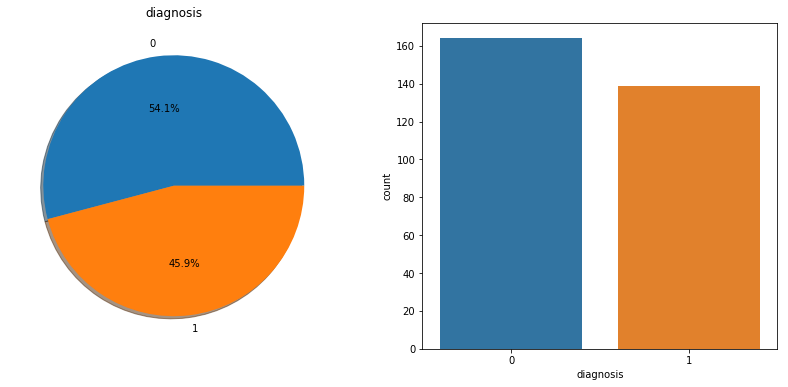

In [7]:
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

### Numeric features

Plotting of the numeric features.

In [8]:
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


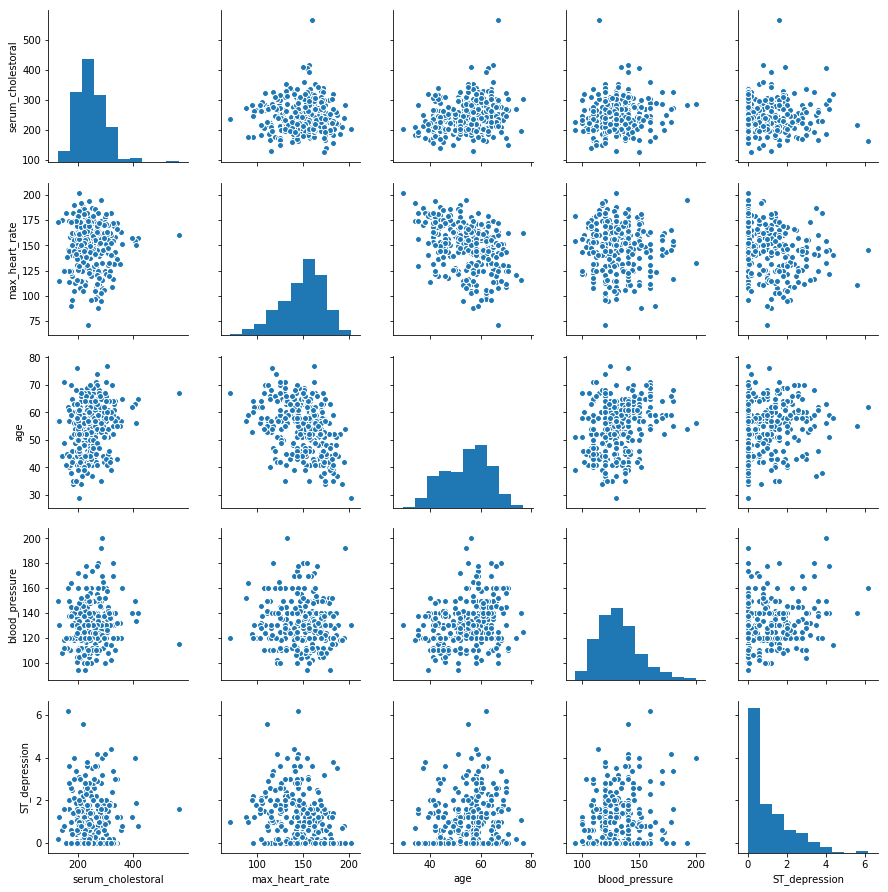

In [9]:
# create a pairplot
sns.pairplot(df[numeric_columns])
plt.show()

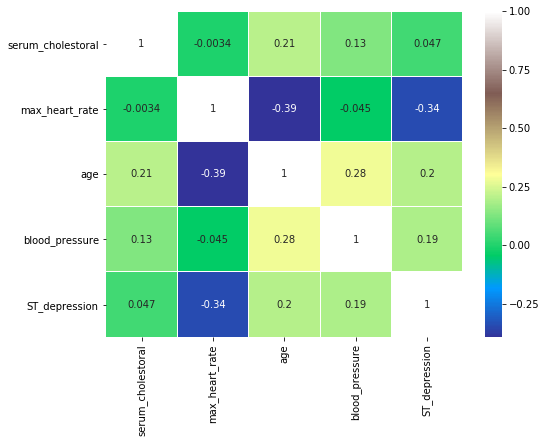

In [10]:
# create a correlation matrix
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'no

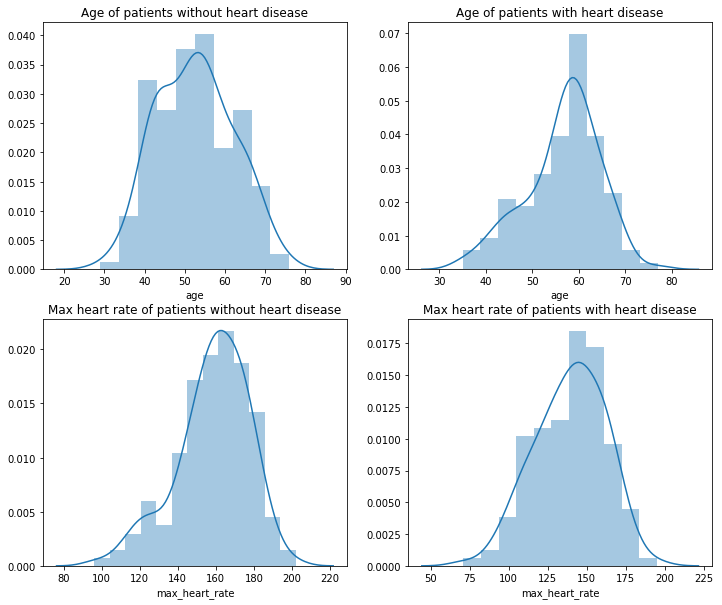

In [11]:
#plotting heart rate and age vs disease
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].max_heart_rate)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

Age distribution of healthy patients is much wider than ill people. The latter are at the highest risk in their sixties. 
Max heart rate distribution does not differ as much, but the risk peaks when *max_heart_rate* value is between 150 and 170.

### Categorical features


In [12]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

In [13]:
# average number of diagnosed people grouped by number of blood vessels detected by fluoroscopy
df[['no_of_vessels','diagnosis']].groupby('no_of_vessels').mean()

,diagnosis
no_of_vessels,
0.0,0.261364
1.0,0.676923
2.0,0.815789
3.0,0.850000


/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


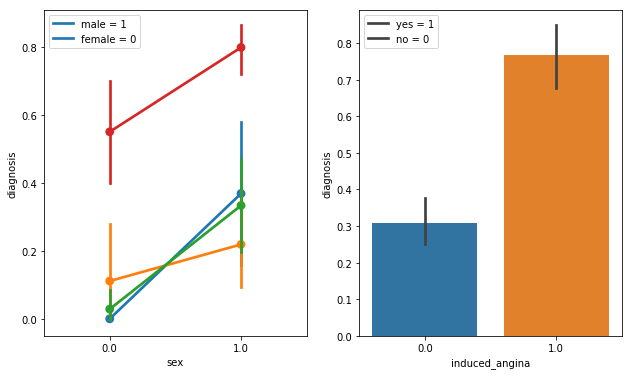

In [14]:
# plotting categorical features
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="diagnosis", hue='chest_pain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])

#### Observations:

1. Men are much more prone to get a heart disease than women.
2. The higher number of vessels detected through fluoroscopy, the higher risk of disease.
3. Angina (chest pain) is a serious warning.

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


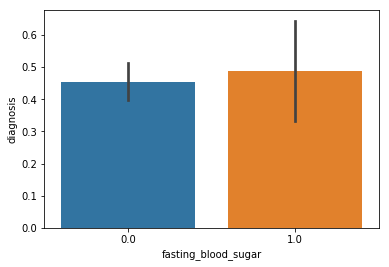

In [15]:
# create a barplot
sns.barplot(x="fasting_blood_sugar", y="diagnosis", data=df)

## 3. Data Preparation

Using fillna to clean dirty data

In [16]:
# show columns having missing values
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

In [17]:
# fill missing values with mode
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

Splitting the dataset into 70-30 for test-train

In [18]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [19]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [20]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Modelling and predicting with Machine Learning

The main goal of the entire project is to predict heart disease occurrence with the highest accuracy.

In [21]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

### K-Nearest Neighbours (KNN)

In [22]:
# KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

Train accuracy: 88.21%
Test accuracy: 86.81%
n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 74.73%
n_neigbors = 2
Train accuracy: 87.74%
Test accuracy: 79.12%
n_neigbors = 3
Train accuracy: 90.57%
Test accuracy: 83.52%
n_neigbors = 4
Train accuracy: 87.74%
Test accuracy: 84.62%
n_neigbors = 5
Train accuracy: 88.21%
Test accuracy: 86.81%
n_neigbors = 6
Train accuracy: 85.38%
Test accuracy: 86.81%
n_neigbors = 7
Train accuracy: 87.26%
Test accuracy: 86.81%
n_neigbors = 8
Train accuracy: 85.38%
Test accuracy: 85.71%
n_neigbors = 9
Train accuracy: 86.32%
Test accuracy: 85.71%


### Decision Trees

DT algorithm creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Train accuracy: 100.00%
Test accuracy: 75.82%


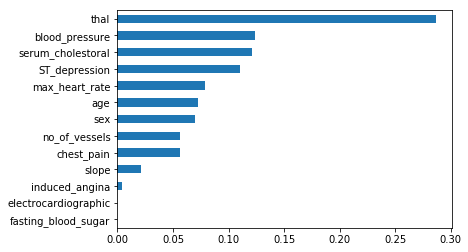

In [23]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [24]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

max_depth = 1
Train accuracy: 76.89%
Test accuracy: 74.73%
max_depth = 2
Train accuracy: 78.30%
Test accuracy: 72.53%
max_depth = 3
Train accuracy: 87.74%
Test accuracy: 76.92%
max_depth = 4
Train accuracy: 91.98%
Test accuracy: 78.02%
max_depth = 5
Train accuracy: 94.81%
Test accuracy: 78.02%
max_depth = 6
Train accuracy: 97.17%
Test accuracy: 79.12%
max_depth = 7
Train accuracy: 97.64%
Test accuracy: 75.82%


With max_depth set as 6, the score is almost 80%.

### Logistic Regression

Logistic regression is a basic technique in statistical analysis that attempts to predict a data value based on prior observations. A logistic regression algorithm looks at the relationship between a dependent variable and one or more dependent variables.

In [25]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 85.85%
Test accuracy: 85.71%


### Gaussian Naive Bayes

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [26]:
#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 85.38%
Test accuracy: 86.81%


### Support Vector Machines

Support Vector Machines are perhaps one of the most popular machine learning algorithms. They are the go-to method for a high-performing algorithm with a little tuning. At first, let's try it on default settings.

In [27]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 92.92%
Test accuracy: 82.42%


In [28]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Train accuracy: 84.91%
Test accuracy: 87.91%


This is the maxiumum accuracy recorded yet.

### Random Forests

Train accuracy: 99.06%
Test accuracy: 83.52%


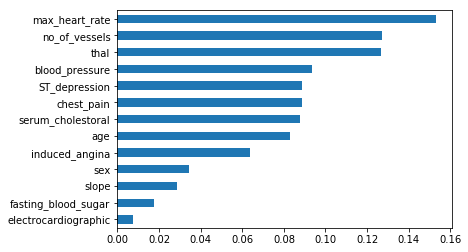

In [29]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [30]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 89.01%


Random forests provides the highest accuracy at 89%.

## 5. Conclusion

In [31]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [32]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.868132
Decision Trees,0.791209
Logistic Regression,0.857143
Naive Bayes,0.868132
SVM,0.879121
Random Forests,0.890110


        Random forests is the most accurate at predicting our model.

In [33]:
#testing our model against several parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]


# loop through algorithms and append the score into the list
for i in models:
    model = i

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_list=list(y_pred)
    y_train_test=list(y_test)

    tp=0
    tn=0
    fp=0
    fn=0

    for x in range(0,len(y_pred)):
        if y_pred_list[x]==1 and y_train_test[x]==1:
            tp = tp + 1
        if y_pred_list[x]==0 and y_train_test[x]==0:
            tn = tn + 1
        if y_pred_list[x]==1 and y_train_test[x]==0:
            fp = fp + 1
        if y_pred_list[x]==0 and y_train_test[x]==1:
            fn = fn + 1
    print(i)
    print('Confusion Matrix: ')
    print('\tActual values')
    print('\t 1\t 0')
    print('1\t',tp,'\t',fp)
    print('0\t',fn,'\t',tn)
    acc=(tp+tn)/(tp+fp+tn+fn)
    print('\nAccuracy: ',acc)
    print('\nMisclassification: ',1-acc)
    print('\nSensitivity: ',tp/(tp+fn))
    print('\nSpecificity: ',tn/(fp+tn))
    prec = tp/(tp+fp)
    print('\nPrecision: ',prec)
    recall = tp/(tp+fn)
    print('\nRecall: ',recall)
    print('\nFscore: ',2*prec*recall/(prec+recall))
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Confusion Matrix: 
	Actual values
	 1	 0
1	 32 	 5
0	 7 	 47

Accuracy:  0.8681318681318682

Misclassification:  0.13186813186813184

Sensitivity:  0.8205128205128205

Specificity:  0.9038461538461539

Precision:  0.8648648648648649

Recall:  0.8205128205128205

Fscore:  0.8421052631578947

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2606,
            splitter='best')
Confusion Matrix: 
	Actual values
	 1	 0
1	 25 	 5
0	 14 	 47

Accuracy:  0.7912087912087912

Misclassification:  0.20879120879120883

Sensitivity:  0.6410256410256411

Specificity:  0.903846153846

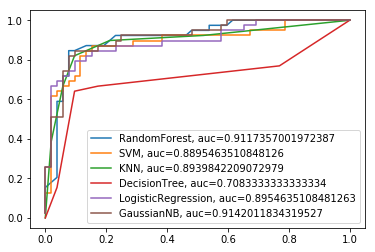

In [35]:
#ROC curve for True Positive Rate vs False Positive Rate
#testing our model against several parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]
modelsname = ["KNN", "DecisionTree", "LogisticRegression",
        "GaussianNB"]

model=RandomForestClassifier(n_estimators=110, random_state=2606)
model.fit(X_train, y_train)
#ROC curve for True Positive Rate vs False Positive Rate
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))
plt.legend(loc=4)

from sklearn.calibration import CalibratedClassifierCV
svm = SVC()
clf = CalibratedClassifierCV(svm)
model=clf
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="SVM, auc="+str(auc))
plt.legend(loc=4)

# loop through algorithms and append the score into the list
for i in range(4):
    
    model = models[i]
    
    model.fit(X_train,y_train)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    #plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot(fpr,tpr,label=modelsname[i]+", auc="+str(auc))
    plt.legend(loc=4)


plt.show()